In [9]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
import mpl_scatter_density
from sklearn.mixture import GaussianMixture

In [5]:
data = ascii.read('Catalogues/NGC2539_2.csv')
data

RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
120.71025827812,-12.22120928683,3036167391483705344,0.1734,0.1294,0.3319,0.2797,4.819,-4.702,0.26,-1.055,0.192,31,1.498,--,0.992,19.148891,19.625938,18.633556,0.992382,--,-31.90155089916,120.7102796591,-12.22120459812,0.35159999999999997
120.71278805329,-12.21728718537,3036167395781707136,0.4152,0.3122,-0.009,0.685,3.841,-2.492,0.572,2.923,0.462,95,--,1.5919,1.071,20.167942,20.735071,19.41633,1.318741,--,-31.89715110779,120.71279938663,-12.21730017699,0.020332000000000003
120.71617245449,-12.21563565598,3036167395781793920,0.5595,0.4507,-0.5966,0.8712,0.663,-0.233,0.749,0.62,0.657,95,--,1.2888,1.085,20.474571,21.347069,19.634233,1.712835,--,-31.89475601197,120.71617351256,-12.21563841286,-0.627124
120.72358133814,-12.2021672871,3036167769440850944,0.1092,0.0847,0.3858,0.1728,3.646,1.53,0.175,-3.309,0.131,31,1.572,--,0.985,18.709621,18.981518,18.259108,0.72241,--,-31.87994604495,120.72357438243,-12.20215257981,0.409012
120.71879995029,-12.21165404943,3036167773738216192,0.1981,0.1428,0.3677,0.3154,1.957,1.433,0.283,-1.333,0.214,95,--,1.3991,0.976,19.27425,20.305452,18.191477,2.113976,--,-31.89027553917,120.71879343335,-12.2116481237,0.379691
120.71402203642,-12.20546839085,3036167773738216576,0.6584,0.54,-1.197,0.9526,3.157,-1.948,0.864,2.484,0.728,95,--,1.2298,0.971,20.612291,21.04988,19.803936,1.245943,--,-31.8853870576,120.71403089421,-12.20547942975,nan
120.72435196942,-12.1991824212,3036167803800593280,0.099,0.075,0.0167,0.1606,0.828,-0.826,0.156,0.049,0.117,31,1.557,--,1.025,18.47254,18.822376,18.062113,0.760263,--,-31.8768676551,120.7243557275,-12.1991826401,0.041235
120.72489712636,-12.19060746093,3036167803805694336,0.2662,0.1951,0.3855,0.4521,2.891,-1.925,0.402,2.156,0.289,31,1.426,--,1.065,19.721247,20.206635,19.098347,1.108288,--,-31.86841434083,120.72490587924,-12.19061704515,0.396444
120.72417017731,-12.19335014557,3036167808097942272,0.8662,0.7475,0.0174,0.8321,3.705,-3.702,1.034,0.156,0.981,95,--,1.4576,1.025,20.428497,20.939964,19.584358,1.355606,--,-31.87124737412,120.72418701017,-12.19335083838,0.025147


In [31]:
data = pd.read_csv('Catalogues/NGC2539_2.csv')
data

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,120.710258,-12.221209,3036167391483705344,0.1734,0.1294,0.3319,0.2797,4.819,-4.702,0.260,...,0.992,19.148891,19.625938,18.633556,0.992382,NaN,-31.901551,120.710280,-12.221205,0.351600
1,120.712788,-12.217287,3036167395781707136,0.4152,0.3122,-0.0090,0.6850,3.841,-2.492,0.572,...,1.071,20.167942,20.735071,19.416330,1.318741,NaN,-31.897151,120.712799,-12.217300,0.020332
2,120.716172,-12.215636,3036167395781793920,0.5595,0.4507,-0.5966,0.8712,0.663,-0.233,0.749,...,1.085,20.474571,21.347069,19.634233,1.712835,NaN,-31.894756,120.716174,-12.215638,-0.627124
3,120.723581,-12.202167,3036167769440850944,0.1092,0.0847,0.3858,0.1728,3.646,1.530,0.175,...,0.985,18.709621,18.981518,18.259108,0.722410,NaN,-31.879946,120.723574,-12.202153,0.409012
4,120.718800,-12.211654,3036167773738216192,0.1981,0.1428,0.3677,0.3154,1.957,1.433,0.283,...,0.976,19.274250,20.305452,18.191477,2.113976,NaN,-31.890276,120.718793,-12.211648,0.379691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324429,122.413531,-10.859482,5728389884894151936,0.2541,0.2224,0.1065,0.3861,1.986,-1.866,0.427,...,1.038,19.528597,20.100914,18.995520,1.105394,NaN,-30.175137,122.413539,-10.859486,0.120980
324430,122.425730,-10.849476,5728389919253898368,0.1619,0.1439,0.2643,0.2365,10.922,-5.841,0.247,...,1.007,19.001371,19.849955,18.213486,1.636469,NaN,-30.162484,122.425757,-10.849517,0.284890
324431,122.428312,-10.847639,5728389923548249216,0.6092,0.5401,-0.3291,0.9027,0.991,0.595,0.846,...,1.166,20.296112,21.529123,18.878445,2.650679,NaN,-30.160079,122.428310,-10.847643,-0.339350
324432,122.398694,-10.852852,5728389953613634688,0.0534,0.0487,0.1473,0.0766,2.325,-2.024,0.078,...,1.031,17.159334,17.467318,16.688830,0.778488,NaN,-30.172304,122.398703,-10.852857,0.178561


In [6]:
df1 = data[["RAJ2000", "DEJ2000", "pmRA", "pmDE", "BP-RP", "Plx_corr"]].copy()

In [7]:
df1

RAJ2000,DEJ2000,pmRA,pmDE,BP-RP,Plx_corr
float64,float64,float64,float64,float64,float64
120.7102796591,-12.22120459812,-4.702,-1.055,0.992382,0.35159999999999997
120.71279938663,-12.21730017699,-2.492,2.923,1.318741,0.020332000000000003
120.71617351256,-12.21563841286,-0.233,0.62,1.712835,-0.627124
120.72357438243,-12.20215257981,1.53,-3.309,0.72241,0.409012
120.71879343335,-12.2116481237,1.433,-1.333,2.113976,0.379691
120.71403089421,-12.20547942975,-1.948,2.484,1.245943,nan
120.7243557275,-12.1991826401,-0.826,0.049,0.760263,0.041235
120.72490587924,-12.19061704515,-1.925,2.156,1.108288,0.396444
120.72418701017,-12.19335083838,-3.702,0.156,1.355606,0.025147


In [16]:
#df1 = df1.to_pandas()
df1 = df1.fillna(0).values 

In [18]:
df1 = pd.DataFrame(df1)

In [20]:
df1= df1.rename(columns={0: 'RAJ2000', 1: 'DEJ2000', 2: 'pmRA', 3 : 'pmDE', 4: 'BP-RP',
                         5: 'Plx_corr'})
df1

,RAJ2000,DEJ2000,pmRA,pmDE,BP-RP,Plx_corr
0,120.710280,-12.221205,-4.702,-1.055,0.992382,0.351600
1,120.712799,-12.217300,-2.492,2.923,1.318741,0.020332
2,120.716174,-12.215638,-0.233,0.620,1.712835,-0.627124
3,120.723574,-12.202153,1.530,-3.309,0.722410,0.409012
4,120.718793,-12.211648,1.433,-1.333,2.113976,0.379691
...,...,...,...,...,...,...
324429,122.413539,-10.859486,-1.866,0.680,1.105394,0.120980
324430,122.425757,-10.849517,-5.841,9.229,1.636469,0.284890
324431,122.428310,-10.847643,0.595,0.793,2.650679,-0.339350
324432,122.398703,-10.852857,-2.024,1.145,0.778488,0.178561


In [35]:
gmm = GaussianMixture(n_components = 5, tol=1e-7, max_iter=1000, random_state=60).fit(df1)

In [36]:
cluster = gmm.predict(df1)
df1['cluster'] = cluster

In [37]:
df1.cluster.value_counts()

cluster
2    141335
1    118432
0     42811
3     20800
4      1056
Name: count, dtype: int64

In [38]:
df2 = data.assign(cluster=df1["cluster"])

In [39]:
a1 = df2[df2["cluster"]==0]
a2 = df2[df2["cluster"]==1]
a3 = df2[df2["cluster"]==2]
a4 = df2[df2["cluster"]==3]
a5 = df2[df2["cluster"]==4]

Text(0, 0.5, 'Gmag (mag)')

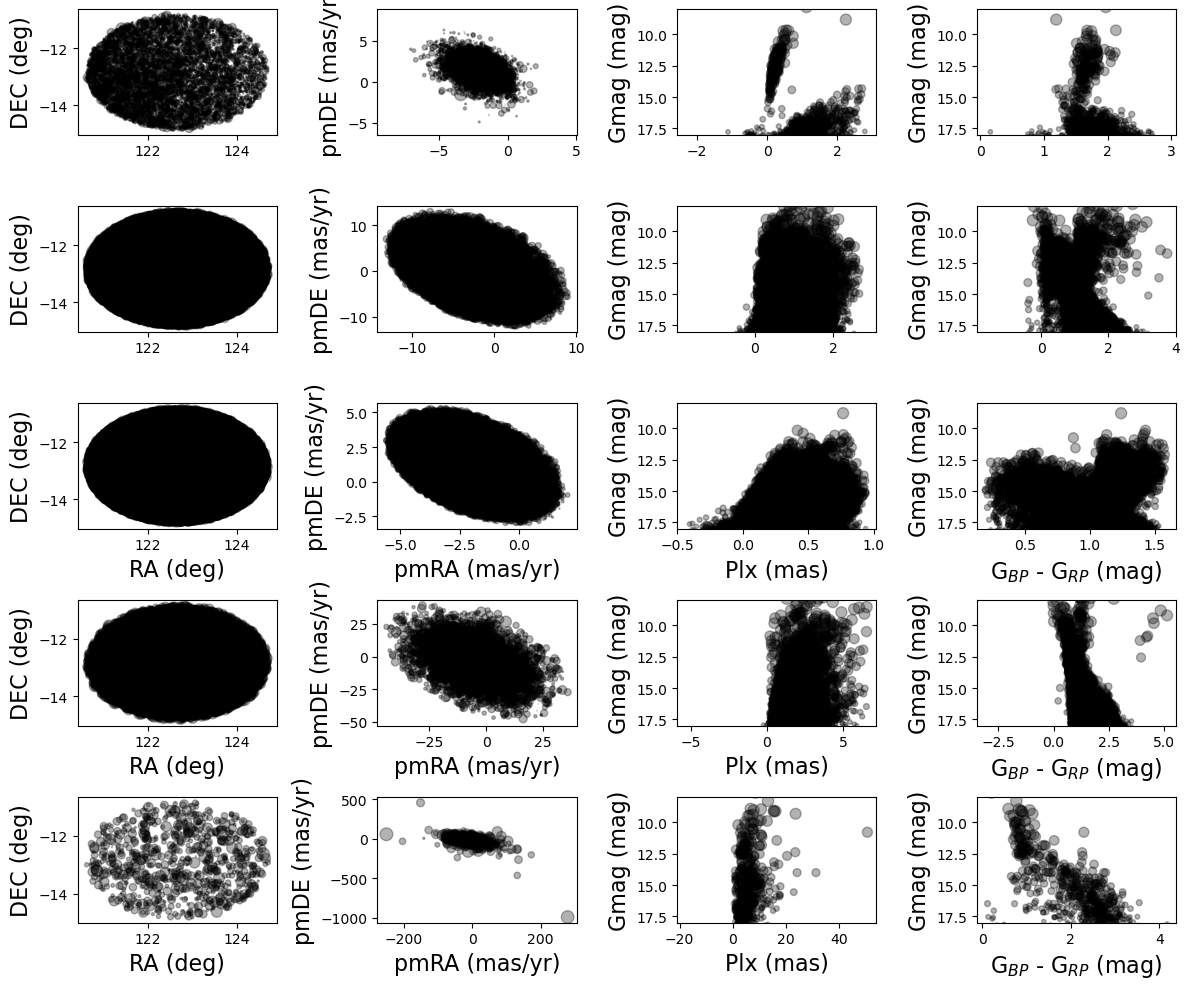

In [42]:
fig,ax = plt.subplots(5,4, figsize=(12,10),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx_corr, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx_corr, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[2,0].scatter(a3.RAJ2000, a3.DEJ2000, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,0].set_xlabel("RA (deg)",fontsize=16)
ax[2,0].set_ylabel("DEC (deg)",fontsize=16)
ax[2,1].scatter(a3.pmRA, a3.pmDE, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[2,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2,2].scatter(a3.Plx_corr, a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,2].set_ylim(18,8)
ax[2,2].set_xlabel("Plx (mas)",fontsize=16)
ax[2,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[2,3].scatter(a3["BP-RP"], a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,3].set_ylim(18,8)
ax[2,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[2,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[3,0].scatter(a4.RAJ2000, a4.DEJ2000, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,0].set_xlabel("RA (deg)",fontsize=16)
ax[3,0].set_ylabel("DEC (deg)",fontsize=16)
ax[3,1].scatter(a4.pmRA, a4.pmDE, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[3,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[3,2].scatter(a4.Plx_corr, a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,2].set_ylim(18,8)
ax[3,2].set_xlabel("Plx (mas)",fontsize=16)
ax[3,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3,3].scatter(a4["BP-RP"], a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,3].set_ylim(18,8)
ax[3,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[3,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[4,0].scatter(a5.RAJ2000, a5.DEJ2000, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,0].set_xlabel("RA (deg)",fontsize=16)
ax[4,0].set_ylabel("DEC (deg)",fontsize=16)
ax[4,1].scatter(a5.pmRA, a5.pmDE, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[4,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[4,2].scatter(a5.Plx_corr, a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,2].set_ylim(18,8)
ax[4,2].set_xlabel("Plx (mas)",fontsize=16)
ax[4,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[4,3].scatter(a5["BP-RP"], a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,3].set_ylim(18,8)
ax[4,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[4,3].set_ylabel("Gmag (mag)",fontsize=16)